In [1]:
import os
# from osgeo import gdal
import numpy as np
from skimage.io import imread, imsave
from pathlib import Path
import random
  

In [2]:
def readImage(fileName):
    if not Path(fileName).is_file():
        print(fileName + "Can not open file!")
    img = imread(fileName)
    # #     The different color bands/channels are stored in the third dimension, 
    # such that a gray-image is MxN, 
    # an RGB-image MxNx3 and 
    # an RGBA-image MxNx4.
    return img

def saveImage(img_arr, fileName):
    imsave(fileName, img_arr)
#     return Path(fileName).is_file()


In [6]:
# Test read file
input_image_path = "../data/RGB.png"
gt_image_path = "../data/GT.png"
 
img_rgb = readImage(input_image_path)
img_gt = readImage(gt_image_path)

saveImage(img_rgb, '../data/Aerial/RGB.Copy.png')
saveImage(img_gt, '../data/Aerial/GT.Copy.png')


In [7]:
img_rgb.shape, img_gt.shape

((1000, 1000, 3), (1000, 1000))

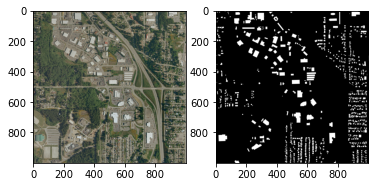

In [8]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_gt, cmap='gray')
plt.show()

In [19]:
img_gt.min(), img_gt.max(), img_rgb.min(), img_rgb.max()

(0, 255, 1, 235)

In [22]:
#  Gt image must be png. 
#  pixel value [0, 255]
# 255 means ignore the pixel values.
# 0 means background.
img_gt =  img_gt.astype(np.bool)
img_gt = img_gt.astype(np.uint8)
obj_ids = np.unique(img_gt)
obj_ids

array([0, 1], dtype=uint8)

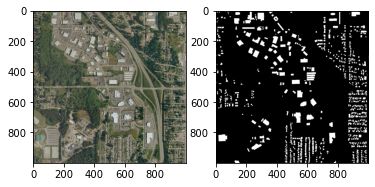

In [23]:
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_gt, cmap='gray')
plt.show()

In [25]:
img_rgb.shape, img_gt.shape

((1000, 1000, 3), (1000, 1000))

In [26]:
def ImgCrop(img, SavePath, CropSize, RepetitionRate, extension='.png'):
    
    Path(SavePath).mkdir(parents=True, exist_ok=True)

    width = img.shape[1]
    height = img.shape[0]
    print(f"Image Size (H, W):{height, width}")
 
    ##  get the current file number (len), use len+1 as new file name. if you do not want to overwirte the image.
    #  new_name = len(os.listdir(SavePath)) + 1
    #  Crop image with RepetitionRate
    new_name = 0
    for i in range(int((height - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
        for j in range(int((width - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
            #  one band
            if(len(img.shape) == 2):
                cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                              int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize]
            #  multi band
            else:
                cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                              int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize, :]
            #  save the image 
            saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
            #  new name + 1
            new_name = new_name + 1
    #  the last column
    for i in range(int((height-CropSize*RepetitionRate)/(CropSize*(1-RepetitionRate)))):
        if(len(img.shape) == 2):
            cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                          (width - CropSize): width]
        else:
            cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                          (width - CropSize): width, :]
        #  写图像
        saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
        new_name = new_name + 1
    #  the last row
    for j in range(int((width - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
        if(len(img.shape) == 2):
            cropped = img[(height - CropSize): height,
                          int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize]
        else:
            cropped = img[(height - CropSize): height,
                          int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize, :]
        saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
        #  文件名 + 1
        new_name = new_name + 1
    #  裁剪右下角
    if(len(img.shape) == 2):
        cropped = img[(height - CropSize): height,
                      (width - CropSize): width]
    else:
        cropped = img[(height - CropSize): height,
                      (width - CropSize): width, : 
                      ]
    saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
    new_name = new_name + 1

In [30]:
def RandomCrop(ImagePath, LabelPath, ImgSavePath, LabelSavePath, CropSize, CutNum, ImageExt='.jpg', MaskExt = '.png' ):
    
    Path(ImgSavePath).mkdir(parents=True, exist_ok=True)
    Path(LabelSavePath).mkdir(parents=True, exist_ok=True)
    
    img = readImage(ImagePath)
    width = img.shape[1]
    height = img.shape[0]


    label = readImage(LabelPath)

    label =  label.astype(np.bool) # False and True
    label = label.astype(np.uint8) # Convert {0, 1}


#   get the current folder image file number
#     fileNum = len(os.listdir(IamgeSavePath))
    fileNum = 0
    new_name = fileNum + 1
    while(new_name < CutNum + fileNum + 1):
        #  crop from top XY 
        UpperLeftX = random.randint(0, height - CropSize)
        UpperLeftY = random.randint(0, width - CropSize)
        if(len(img.shape) == 2):
            imgCrop = img[UpperLeftX: UpperLeftX + CropSize,
                          UpperLeftY: UpperLeftY + CropSize]
        else:
            imgCrop = img[UpperLeftX: UpperLeftX + CropSize,
                          UpperLeftY: UpperLeftY + CropSize, :]
        if(len(label.shape) == 2):
            labelCrop = label[UpperLeftX: UpperLeftX + CropSize,
                              UpperLeftY: UpperLeftY + CropSize]
        else:
            labelCrop = label[UpperLeftX: UpperLeftX + CropSize,
                              UpperLeftY: UpperLeftY + CropSize, :]
        saveImage(imgCrop, f"{ImgSavePath}/{str(new_name)}{ImageExt}" )
        saveImage(labelCrop,f"{LabelSavePath}/{str(new_name)}{MaskExt}")
        new_name = new_name + 1

In [29]:
RGB_Path = "../data/RGB.png"
RGB_SavePath = "../data/Aerial/RGB"

GT_Path = "../data/GT.png"
GT_SavePath = "../data/Aerial/GT"

CropSize = 250  
RepetitionRate = 0

# RGB image
img_rgb = readImage(RGB_Path)
ImgCrop(img_rgb, RGB_SavePath, CropSize, RepetitionRate, extension='.jpg')

# Convert image to [0, 1] 
img_mask = readImage(GT_Path)
img_mask =  img_mask.astype(np.bool)
img_mask = img_mask.astype(np.uint8)
ImgCrop(img_mask, GT_SavePath, CropSize, RepetitionRate)





Image Size (H, W):(1000, 1000)
Image Size (H, W):(1000, 1000)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/0.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/1.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/2.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/3.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/4.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/5.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/6.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/GT/7.pn

In [31]:
ImagePath = "../data/RGB.png"
LabelPath = "../data/GT.png"

ImgSavePath = "../data/Aerial/JPEGImages"
LabelSavePath = "../data/Aerial/Annotations"
CropSize = 250
CutNum = 50

RandomCrop(ImagePath, LabelPath, ImgSavePath, LabelSavePath, CropSize, CutNum)

<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/1.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/2.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/3.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/4.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/5.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/6.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annotations/7.png is a low contrast image
  imsave(fileName, img_arr)
<ipython-input-2-c614eab48461>:12: UserWarning: ../data/Aerial/Annota